# Deep Learning - Report 1
This is a template notebook of your report. Please complete your report with your team mate following these instructions:
- Work on the exercies below by filling the notebook.
- **Rename your notebook** in the format `FirstName1FAMILYNAME1_FirstName2FAMILYNAME2_report1.ipynb`. For example, when the team consists of Johann FAOUZI and Ikko Yamane, the file name should look like `JohannFAOUZI_IkkoYAMANE_report1.ipynb`.
- You are only allowed to edit new cells you have added (except the "Solution to Exercise 0" cell).
- Write `### Solution to Exercise (number)` at the beginning of each cell you add.
- Please submit your notebook on Moodle.
- The submission deadline is 17:00 (UTC+2) of September 19, 2023.
- Explain your code with comment or/and markdown. The explanations will be taken into account for the evaluation.

## Exercise 0
- Rename your notebook in the format `FirstName1FAMILYNAME1_FirstName2FAMILYNAME2_report1.ipynb`.
- Write your names and email addresses.

### Solution to Exercise 0
- Name of Author 1: GANIYU Isaac
- Name of Author 2: DECROS Florian
- Email address of Author 1: isaac.ganiyu@eleve.ensai.fr
- Email address of Author 2: florian.decros@eleve.ensai.fr

## CIFAR-10
We are going to work on the [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) [Krizhevsky 2009].

For the purpose of testing your skills, we are going to directly download an original dataset and manually adapt it to the PyTorch format. The following three cells download the data, create NumPy arrays of them, and show examples. The `load_cifar10` function converts the color images to gray-scale ones when `color=False`.

[Krizhevsky 2009] [Learning Multiple Layers of Features from Tiny Images, Alex Krizhevsky, 2009.](https://www.cs.toronto.edu/~kriz/learning-features-2009-TR.pdf)

In [ ]:
import pickle
import numpy as np
import urllib.request
import tarfile
import os.path
from pathlib import Path

def download_cifar10():
    filename = 'cifar-10.tar.gz'
    if os.path.isfile(filename):
        print(f'{filename} already exists. Skipping downloading.')
        return

    url = 'https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz'

    with urllib.request.urlopen(url) as testfile, open('cifar-10.tar.gz', 'wb') as f:
        f.write(testfile.read())


def extract_cifar10(filename="cifar-10.tar.gz"):
    dirname = 'cifar-10-batches-py'
    if Path(dirname).is_dir():
        print(f'{dirname} already exists. Skipping extracting.')
        return

    tar = tarfile.open(filename)
    tar.extractall()
    tar.close()


def load_cifar10(train, dir='cifar-10-batches-py', color=False):
    data_raw = []
    if train:
        for i in range(5):
            with open(f'{dir}/data_batch_{i+1}', 'rb') as f:
                data_raw.append(pickle.load(f, encoding='bytes'))
        x = np.concatenate(
            [d[b'data'] for d in data_raw],
            axis=0)
        y = np.concatenate(
            [d[b'labels'] for d in data_raw],
            axis=0)
    else:
        with open(f'{dir}/test_batch', 'rb') as f:
            data_raw = pickle.load(f, encoding='bytes')
        x = np.array(data_raw[b'data'])
        y = np.array(data_raw[b'labels'])

    x = np.reshape(x, newshape=(len(x), 3, 32, 32))
    if not color:
        x = x.mean(axis=1, keepdims=True)  # Convert Red-Green-Blue (RGB) images to gray-scale.
    return x, y

In [ ]:
download_cifar10()
extract_cifar10()
x_train_val_np, y_train_val_np = load_cifar10(train=True)
x_test_np, y_test_np = load_cifar10(train=False)

['truck', 'truck', 'deer', 'automobile', 'automobile']


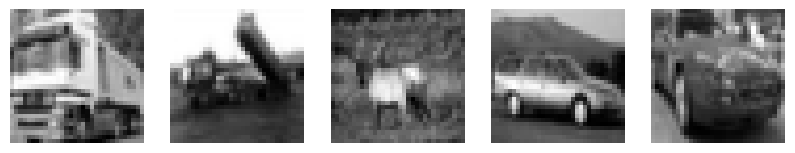

In [ ]:
import matplotlib.pyplot as plt

id2class = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck'
}

def plot_images(x, y, rows=1, cols=5, color=False):
    figure = plt.figure(figsize=(2 * cols, 2 * rows))
    ys = []
    for i in range(rows):
        for j in range(cols):
            k = (i * cols) + j + 1
            figure.add_subplot(rows, cols, k)
            plt.axis("off")
            if color:
                plt.imshow(np.transpose(x[k], [1, 2, 0]))
            else:
                plt.imshow(np.transpose(x[k], [1, 2, 0]), cmap="gray")
            ys.append(y[k])
    print([id2class[id] for id in ys])
    plt.show()

plot_images(x_train_val_np, y_train_val_np, rows=1, cols=5)

## Exercise 1
Randomly split the dataset `(x_train_val_np, y_train_val_np)` to a training set `(x_train_np, y_train_np)` and a validation set `(x_val_np, y_val_np)`. Here, take `40000` data points for the training set and put the rest in the validation set.

Solution to Exercise 1

In [ ]:
print(x_train_val_np.shape)
y_train_val_np.shape

(50000, 1, 32, 32)


(50000,)

In [ ]:
from sklearn.model_selection import train_test_split

x_train_np, x_val_np, y_train_np, y_val_np = train_test_split(x_train_val_np, y_train_val_np, train_size=40000,
                                                              stratify = y_train_val_np, random_state = 6)
# we use the stratify parameter to have the same class distribution in the sets and the random_state parameter to fix the randomness
print("shapes of x_train_np: ", x_train_np.shape)
print("shapes of x_val_np: ", x_val_np.shape)
print("shapes of y_train_np: ", y_train_np.shape)
print("shapes of y_val_np: ", y_val_np.shape)

shapes of x_train_np:  (40000, 1, 32, 32)
shapes of x_val_np:  (10000, 1, 32, 32)
shapes of y_train_np:  (40000,)
shapes of y_val_np:  (10000,)


## Exercise 2
Write code to convert `x_train_np, y_train_np, x_val_np, y_val_np, x_test_np, y_test_np` to PyTorch Tensors.
Name the tensors as `x_train, y_train, x_val, y_val, x_test, y_test`, respectively.

**Note**: You may need to explicitly change the `dtype` of your tensors. PyTorch by default requires the type (`dtype`) of input tensor to be `torch.float32` and that of the labels to be `torch.int64`.

Solution to Exercise 2

In [ ]:
import torch

x_train = torch.from_numpy(x_train_np) # convert from numpy to tensor
x_train.to(dtype=torch.float32) #changing the dtype
x_train.dtype

torch.float64

In [ ]:
y_train = torch.from_numpy(y_train_np)
y_train.to(dtype=torch.int64)
y_train.dtype

torch.int64

In [ ]:
x_val = torch.from_numpy(x_val_np)
x_val.to(dtype=torch.float32)
x_val.dtype

torch.float64

In [ ]:
y_val = torch.from_numpy(y_val_np)
y_val.to(dtype=torch.int64)
y_val.dtype

torch.int64

In [ ]:
x_test = torch.from_numpy(x_test_np)
x_test.to(dtype=torch.float32)
x_test.dtype

torch.float64

In [ ]:
y_test = torch.from_numpy(y_test_np)
y_test.to(dtype=torch.int64)
y_test.dtype

torch.int64

## Exercise 3
Write a Python class `CustomDataset` deriving `torch.utils.data.Dataset` and create dataloaders for the training, validation, and test sets.

**Bonus** If possible, making the `transform` parameter and pass `ToTensor()` to it to avoid manually converting data to PyTorch tensors as in Exercise 2.

Solution of excercise 3

In [ ]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from torchvision.transforms import ToTensor, Compose

class CustomDataset(Dataset):
    def __init__(self, X, y, transform=None):  # adding the transform parameter
        self.X = torch.tensor(X, dtype=torch.float32) # applying the transform ToTensor() and changing the dtype directly
        self.y = torch.tensor(y, dtype=torch.int64) # applying the transform ToTensor() and changing the dtype directly
        self.transform = transform

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        X_idx = self.X[idx]
        y_idx = self.y[idx]

        if self.transform: #we apply the transform before returning the data
            X_idx = self.transform(X_idx)

        return X_idx, y_idx



In [ ]:
from torchvision.transforms.v2 import ToDtype

# creating the different dataloaders
train_dataloader = DataLoader(CustomDataset(x_train, y_train), batch_size=64, shuffle=True) # shuffle parameter allows us to shuffle the data at each epoch
val_dataloader = DataLoader(CustomDataset(x_val, y_val), batch_size=64, shuffle=True)
test_dataloader = DataLoader(CustomDataset(x_test, y_test), batch_size=64, shuffle=True)


/usr/local/lib/python3.10/dist-packages/torchvision/datapoints/__init__.py:12: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https://github.com/pytorch/vision/issues/6753, and you can also check out https://github.com/pytorch/vision/issues/7319 to learn more about the APIs that we suspect might involve future changes. You can silence this warning by calling torchvision.disable_beta_transforms_warning().
  warnings.warn(_BETA_TRANSFORMS_WARNING)
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/v2/__init__.py:54: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https:/

## Exercise 4
Let the variable `device` be `'cuda'` if CUDA (GPU) is available. Otherwise, let it be `'cpu'`.
(Do **not** move the tensors from Exercise 1 to this `device` yet.)

Solution of excercise 4


In [ ]:
if torch.cuda.is_available():
  device = "cuda"
else :
  device = "cpu"

device

'cuda'

## Exercise 5
Write a Python class `MLP5` for Multi-Layer Perceptron (MLP) with 5 layers derivng from `nn.Module` or `nn.Sequencial`.
Your network must have the following sequential architecture:
- First hidden layer: Linear layer (64 output features) + ReLU activation function
- Second hidden layer: Linear layer (64 output features) + ReLU activation function
- Third hidden layer: Linear layer (64 output features) + ReLU activation function
- Forth hidden layer: Linear layer (64 output features) + ReLU activation function
- Final layer: Linear layer

Note that the final layer should have the output dimensionality equal to the number of classes in order to express class posterior probabilities.

Solution of excercise 5

In [ ]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
from torch import nn

output_len = len(np.unique(y_train)) # number of classes

# The class should inherit from the nn.Module and implement the two methods __init__ and forward
class MLP5(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(  # implementing the different layers
            nn.Linear(1024, 64),  # 1024 is the input size
            nn.ReLU(), # activation function
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, output_len),
        )

    def forward(self, x): # The forward method defines the forward pass through the network.
        x = self.flatten(x)
        return self.linear_relu_stack(x)

## Exercise 6
- Write a Python function for training a model with mini-batch updates for one epoch. Do not forget to move your mini-batch data to `device`.
- Also, write Python function for evaluating the loss and the accuracy of a given model with a given dataloader.

Solution of exercise 6

In [ ]:
def train_loop(dataloader, model, loss_fn, optimizer, device):
    size = len(dataloader.dataset)

    model.train()

    for batch, (X, y) in enumerate(dataloader):
        X = X.to(device)
        y = y.to(device)

        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        # Display loss from time to time
        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss: >7f}  [{current: >5d} / {size: >5d}]")


def evaluate_loop(dataloader, model, loss_fn, device, set_='Validation'):

    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            X = X.to(device)
            y = y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"\n{set_} set: \n  Accuracy: {(100 * correct): >0.1f}%, Avg loss: {test_loss: >8f} \n")

## Exercise 7
- Create an object using your class and keep it in the `modelMLP5` variable. Do not forget move your model to `device`.
- Choose any loss function.
- Create an optimizer for optimizing `modelMLP5`.
- Train `modelMLP5` with your function(s) for 10 epochs. During the training, print the training and validation loss/accuracy every epoch.

You may need to tune hyper-parameters such as the learning rate later while observing the behavior of the model during the training.

Solution of exercise 7

In [ ]:
modelMLP5 = MLP5().to(device) #object of class MLP5 and moving to device

In [ ]:
#Choosing cross entropy loss function
loss_fn = nn.CrossEntropyLoss()

In [ ]:
#Using stochastic gradient descent for the optimizer and 1e-3 for step-size
learning_rate = 1e-3
optimizer = torch.optim.SGD(modelMLP5.parameters(), lr=learning_rate)

In [ ]:
epochs = 10

for t in range(epochs):
    print(f"Epoch {t + 1}\n-------------------------------")
    train_loop(train_dataloader, modelMLP5, loss_fn, optimizer, device)
    evaluate_loop(val_dataloader, modelMLP5, loss_fn, device)

Epoch 1
-------------------------------
loss: 3.496277  [   64 / 40000]
loss: 2.239365  [ 6464 / 40000]
loss: 2.126370  [12864 / 40000]
loss: 2.300689  [19264 / 40000]
loss: 1.992010  [25664 / 40000]
loss: 2.082762  [32064 / 40000]
loss: 2.095412  [38464 / 40000]

Validation set: 
  Accuracy: 24.6%, Avg loss: 2.066419 

Epoch 2
-------------------------------
loss: 2.054154  [   64 / 40000]
loss: 1.967783  [ 6464 / 40000]
loss: 1.966103  [12864 / 40000]
loss: 1.954384  [19264 / 40000]
loss: 2.030212  [25664 / 40000]
loss: 2.033156  [32064 / 40000]
loss: 2.104990  [38464 / 40000]

Validation set: 
  Accuracy: 28.2%, Avg loss: 2.005207 

Epoch 3
-------------------------------
loss: 1.927012  [   64 / 40000]
loss: 1.979762  [ 6464 / 40000]
loss: 2.017225  [12864 / 40000]
loss: 1.821216  [19264 / 40000]
loss: 1.921048  [25664 / 40000]
loss: 2.097141  [32064 / 40000]
loss: 2.037457  [38464 / 40000]

Validation set: 
  Accuracy: 29.3%, Avg loss: 1.962265 

Epoch 4
--------------------------

## Exercise 8
Write a Python class `MLP5BN` similarly to `MLP5`, but put a batch normalization layer (`torch.nn.BatchNorm1d`) before every activation layer.
Then, create an object using your class and keep it in the `modelMLP5BN` variable. Train this model and compare the results for `modelMLP5` and `modelMLP5BN`.

Solution of exercise 8

In [ ]:
from torch import nn


# The class should inherit from the nn.Module and implement the two methods __init__ and forward
class MLP5BN(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(1024, 64),
            nn.BatchNorm1d(64), # batch normalization layer with the number of features equal to 64
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Linear(64, output_len)
        )

    def forward(self, x): # The forward method defines the forward pass through the network.
        x = self.flatten(x)
        return self.linear_relu_stack(x)

In [ ]:
modelMLP5BN = MLP5BN().to(device)

#Using stochastic gradient descent for the optimizer and 1e-3 for step-size
learning_rate = 1e-3
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(modelMLP5BN.parameters(), lr=learning_rate)

In [ ]:
for t in range(epochs):
    print(f"Epoch {t + 1}\n-------------------------------")
    train_loop(train_dataloader, modelMLP5BN, loss_fn, optimizer, device)
    evaluate_loop(val_dataloader, modelMLP5BN, loss_fn, device)

Epoch 1
-------------------------------
loss: 2.389149  [   64 / 40000]
loss: 2.340690  [ 6464 / 40000]
loss: 2.224452  [12864 / 40000]
loss: 2.278910  [19264 / 40000]
loss: 2.107138  [25664 / 40000]
loss: 2.205730  [32064 / 40000]
loss: 2.135494  [38464 / 40000]

Validation set: 
  Accuracy: 24.2%, Avg loss: 2.148784 

Epoch 2
-------------------------------
loss: 2.174519  [   64 / 40000]
loss: 2.074400  [ 6464 / 40000]
loss: 2.148257  [12864 / 40000]
loss: 2.089277  [19264 / 40000]
loss: 2.063035  [25664 / 40000]
loss: 2.016971  [32064 / 40000]
loss: 2.074417  [38464 / 40000]

Validation set: 
  Accuracy: 28.5%, Avg loss: 2.069112 

Epoch 3
-------------------------------
loss: 2.048801  [   64 / 40000]
loss: 2.048280  [ 6464 / 40000]
loss: 2.125125  [12864 / 40000]
loss: 1.941204  [19264 / 40000]
loss: 2.034583  [25664 / 40000]
loss: 1.899674  [32064 / 40000]
loss: 2.010813  [38464 / 40000]

Validation set: 
  Accuracy: 30.3%, Avg loss: 2.012336 

Epoch 4
--------------------------

When using the Gradient descent as optimizer we do not notice a large difference between the performance of MLP5BN and the one of MLP5. However we can use here another optimizer : the adaptative moment estimation.

In [ ]:
optimizer = torch.optim.Adam(params=modelMLP5BN.parameters(), lr=1e-3) #adaptative moment optimizer

In [ ]:
for t in range(epochs):
    print(f"Epoch {t + 1}\n-------------------------------")
    train_loop(train_dataloader, modelMLP5BN, loss_fn, optimizer, device)
    evaluate_loop(val_dataloader, modelMLP5BN, loss_fn, device)

Epoch 1
-------------------------------
loss: 1.860796  [   64 / 40000]
loss: 1.807316  [ 6464 / 40000]
loss: 1.904148  [12864 / 40000]
loss: 1.735212  [19264 / 40000]
loss: 1.742115  [25664 / 40000]
loss: 1.741662  [32064 / 40000]
loss: 1.844354  [38464 / 40000]

Validation set: 
  Accuracy: 35.4%, Avg loss: 1.798849 

Epoch 2
-------------------------------
loss: 1.832559  [   64 / 40000]
loss: 1.751490  [ 6464 / 40000]
loss: 1.788820  [12864 / 40000]
loss: 1.766095  [19264 / 40000]
loss: 1.633330  [25664 / 40000]
loss: 1.533624  [32064 / 40000]
loss: 1.549862  [38464 / 40000]

Validation set: 
  Accuracy: 37.5%, Avg loss: 1.751376 

Epoch 3
-------------------------------
loss: 1.494072  [   64 / 40000]
loss: 1.614352  [ 6464 / 40000]
loss: 1.590360  [12864 / 40000]
loss: 1.584679  [19264 / 40000]
loss: 1.711880  [25664 / 40000]
loss: 1.637505  [32064 / 40000]
loss: 1.713174  [38464 / 40000]

Validation set: 
  Accuracy: 38.9%, Avg loss: 1.723345 

Epoch 4
--------------------------

Now the MLP5BN is much better since the accuracies and the average losses are better. However, it seems that, with this optimizer, the accuracy is not increasing from one epoch to the next anymore.


In [ ]:
#Evaluating on the test dataloader
print("model MLP5")
evaluate_loop(test_dataloader, modelMLP5, loss_fn, device, set_= 'Test')
print("model MLP5BN")
evaluate_loop(test_dataloader, modelMLP5BN, loss_fn, device, set_= 'Test' )



model MLP5

Test set: 
  Accuracy: 34.0%, Avg loss: 1.837977 

model MLP5BN

Test set: 
  Accuracy: 40.4%, Avg loss: 1.717094 



We can see that the model MLP5BN is better than the MLP5

## Exercise 9
The following Python class `LeNet5` is an implementation of a Convolutional Neural Network (CNN).
Train this model and compare it with the previous two models. (Ignore the `num_channels` parameter of the class for now. Set it to the default value `1`.)

In [ ]:
class LeNet5(nn.Module):
    def __init__(self, num_classes=10):
        super(LeNet5, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=0),
            nn.BatchNorm2d(6),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(6, 16, kernel_size=5, stride=1, padding=0),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.flatten = nn.Flatten()
        self.fc = nn.Linear(400, 120)
        self.relu = nn.ReLU()
        self.fc1 = nn.Linear(120, 84)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(84, num_classes)

    def forward(self, x):
        out = self.layer1(x)  # Second dimension is for channels, but we only have one channel.
        out = self.layer2(out)
        out = self.flatten(out)
        out = self.fc(out)
        out = self.relu(out)
        out = self.fc1(out)
        out = self.relu1(out)
        out = self.fc2(out)
        return out

Solution of exercise 9

In [ ]:
modelLeNet5 = LeNet5().to(device) # creating an instance of the classe and moving it to the device
loss_fn=nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=modelLeNet5.parameters(), lr=1e-3) #adaptative moment optimizer
epochs =10

for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, modelLeNet5, loss_fn, optimizer, device)
    evaluate_loop(val_dataloader, modelLeNet5, loss_fn, device)

Epoch 1
-------------------------------
loss: 2.304760  [   64 / 40000]
loss: 1.720094  [ 6464 / 40000]
loss: 1.678812  [12864 / 40000]
loss: 1.773762  [19264 / 40000]
loss: 1.307057  [25664 / 40000]
loss: 1.773493  [32064 / 40000]
loss: 1.312226  [38464 / 40000]

Validation set: 
  Accuracy: 48.3%, Avg loss: 1.437194 

Epoch 2
-------------------------------
loss: 1.456172  [   64 / 40000]
loss: 1.553846  [ 6464 / 40000]
loss: 1.510741  [12864 / 40000]
loss: 1.249489  [19264 / 40000]
loss: 1.200642  [25664 / 40000]
loss: 1.131436  [32064 / 40000]
loss: 1.233128  [38464 / 40000]

Validation set: 
  Accuracy: 52.2%, Avg loss: 1.339954 

Epoch 3
-------------------------------
loss: 1.345139  [   64 / 40000]
loss: 1.236427  [ 6464 / 40000]
loss: 1.239468  [12864 / 40000]
loss: 1.176434  [19264 / 40000]
loss: 1.114051  [25664 / 40000]
loss: 1.037642  [32064 / 40000]
loss: 1.141836  [38464 / 40000]

Validation set: 
  Accuracy: 52.7%, Avg loss: 1.386907 

Epoch 4
--------------------------

In [ ]:
#Evaluating on the test dataloader
print("model MLP5")
evaluate_loop(test_dataloader, modelMLP5, loss_fn, device, set_= 'Test')
print("model MLP5BN")
evaluate_loop(test_dataloader, modelMLP5BN, loss_fn, device, set_= 'Test' )
print("model LeNet5")
evaluate_loop(test_dataloader, modelLeNet5, loss_fn, device, set_= 'Test' )

model MLP5

Test set: 
  Accuracy: 34.0%, Avg loss: 1.840185 

model MLP5BN

Test set: 
  Accuracy: 40.4%, Avg loss: 1.717322 

model LeNet5

Test set: 
  Accuracy: 57.7%, Avg loss: 1.241938 



the LeNet model performs better than the previous two models since the accuracy and the average loss are better

## Exercise 10
Below is the same dataset but with colors. For expressing the intensities for the red, green, blue colors, each image has 3 *channels* now, which is why the shape of each image is `(3, 32, 32)`.
The goal of this exercise is to train a classifier using `LeNet5`, but the `LeNet5` class defined above assumes that input images have only one channel, so we need to rewrite the class a bit. For that, read [the documentation for `torch.nn.Conv2d` class](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html?highlight=conv2d#torch.nn.Conv2d) to understand how to modify the first layer of the `LeNet5` class. Write code for this modified class, naming it `LeNet5Color`.

['truck', 'truck', 'deer', 'automobile', 'automobile']


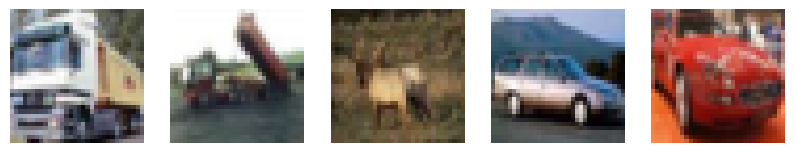

Shape of an image: (3, 32, 32)


In [ ]:
x_train_val_np_color, y_train_val_np_color = load_cifar10(train=True, color=True)
x_test_np_color, y_test_np_color = load_cifar10(train=False, color=True)
plot_images(x_train_val_np_color, y_train_val_np_color, rows=1, cols=5, color=True)
print(f'Shape of an image: {x_train_val_np_color[0].shape}')

Solution of exercise 10

In [ ]:
class LeNet5Color(nn.Module):
    def __init__(self, num_classes=10):
        super(LeNet5Color, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 6, kernel_size=5, stride=1, padding=0), #we modify the first parameter(in_channels) from 1 to 3 because each image has 3 channels now
            nn.BatchNorm2d(6),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(6, 16, kernel_size=5, stride=1, padding=0),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.flatten = nn.Flatten()
        self.fc = nn.Linear(400, 120)
        self.relu = nn.ReLU()
        self.fc1 = nn.Linear(120, 84)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(84, num_classes)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.flatten(out)
        out = self.fc(out)
        out = self.relu(out)
        out = self.fc1(out)
        out = self.relu1(out)
        out = self.fc2(out)
        return out

## Exercise 11
Split the data, create dataloaders, train an instance of `LeNet5Color`, and compare it with `LeNet5` using the test set.

Solution of exercise 11

In [ ]:
#Split data
x_train_np_col, x_val_np_col, y_train_np_col, y_val_np_col = train_test_split(x_train_val_np_color, y_train_val_np_color, train_size=40000,
                                                              stratify = y_train_val_np_color, random_state = 6)

# create tensors
x_train_col = torch.from_numpy(x_train_np_col).to(dtype=torch.float32)
y_train_col = torch.from_numpy(y_train_np_col).to(dtype=torch.int64)
x_val_col = torch.from_numpy(x_val_np_col).to(dtype=torch.float32)
y_val_col = torch.from_numpy(y_val_np_col).to(dtype=torch.int64)
x_test_col = torch.from_numpy(x_test_np_color).to(dtype=torch.float32)
y_test_col = torch.from_numpy(y_test_np_color).to(dtype=torch.int64)

#create dataloaders
train_dataloader_color = DataLoader(CustomDataset(x_train_col, y_train_col), batch_size=64, shuffle=True)
val_dataloader_color = DataLoader(CustomDataset(x_val_col, y_val_col), batch_size=64, shuffle=True)
test_dataloader_color = DataLoader(CustomDataset(x_test_col, y_test_col), batch_size=64, shuffle=True)


<ipython-input-12-d19eb33125b3>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.X = torch.tensor(X, dtype=torch.float32) # applying the transform ToTensor() and changing the dtype directly
<ipython-input-12-d19eb33125b3>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.y = torch.tensor(y, dtype=torch.int64) # applying the transform ToTensor() and changing the dtype directly


In [ ]:
modelLeNet5Color = LeNet5Color().to(device) # an instance of LeNet5Color moved to device
loss_fn=nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=modelLeNet5Color.parameters(), lr=1e-3) #adaptative moment optimizer

#train the model
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader_color, modelLeNet5Color, loss_fn, optimizer, device)
    evaluate_loop(val_dataloader_color, modelLeNet5Color, loss_fn, device)

Epoch 1
-------------------------------
loss: 2.321281  [   64 / 40000]
loss: 1.544191  [ 6464 / 40000]
loss: 1.296797  [12864 / 40000]
loss: 1.376937  [19264 / 40000]
loss: 1.503104  [25664 / 40000]
loss: 1.311227  [32064 / 40000]
loss: 1.429634  [38464 / 40000]

Validation set: 
  Accuracy: 46.1%, Avg loss: 1.493958 

Epoch 2
-------------------------------
loss: 1.270095  [   64 / 40000]
loss: 1.327270  [ 6464 / 40000]
loss: 1.208655  [12864 / 40000]
loss: 1.144135  [19264 / 40000]
loss: 1.316510  [25664 / 40000]
loss: 1.229648  [32064 / 40000]
loss: 1.132710  [38464 / 40000]

Validation set: 
  Accuracy: 53.8%, Avg loss: 1.298975 

Epoch 3
-------------------------------
loss: 1.086879  [   64 / 40000]
loss: 0.877719  [ 6464 / 40000]
loss: 1.180376  [12864 / 40000]
loss: 1.239689  [19264 / 40000]
loss: 1.179618  [25664 / 40000]
loss: 1.146882  [32064 / 40000]
loss: 1.242786  [38464 / 40000]

Validation set: 
  Accuracy: 56.8%, Avg loss: 1.237095 

Epoch 4
--------------------------

In [ ]:
#Evaluating on the test dataloader without colors

print("model LeNet5")
evaluate_loop(test_dataloader, modelLeNet5, loss_fn, device, set_= 'Test' )

print("model LeNet5Color")
evaluate_loop(test_dataloader, modelLeNet5Color, loss_fn, device, set_= 'Test' )

model LeNet5

Test set: 
  Accuracy: 57.7%, Avg loss: 1.245549 

model LeNet5Color


RuntimeError: ignored

In [ ]:
#Evaluating on the test dataloader with colors

print("model LeNet5")
evaluate_loop(test_dataloader_color, modelLeNet5, loss_fn, device, set_= 'Test' )

print("model LeNet5Color")
evaluate_loop(test_dataloader_color, modelLeNet5Color, loss_fn, device, set_= 'Test' )

model LeNet5


RuntimeError: ignored

We get an error if we use the test dataloader (without colors) for testing the two models. This is because the model LeNet5Color is expected data (images) with colors. Likewise, we also get an error if we use the test dataloader (with colors) for testing the two models since LeNet5 is expected data(images) without colors. So the two models are not comparable on the same basis.

We can show the test accuracy on each suitable test dataloader

In [ ]:
#Evaluating on the test dataloader, one with colors and the second one without

print("model LeNet5")
evaluate_loop(test_dataloader, modelLeNet5, loss_fn, device, set_= 'Test' )

print("model LeNet5Color")
evaluate_loop(test_dataloader_color, modelLeNet5Color, loss_fn, device, set_= 'Test' )

model LeNet5

Test set: 
  Accuracy: 57.7%, Avg loss: 1.244318 

model LeNet5Color

Test set: 
  Accuracy: 63.5%, Avg loss: 1.071223 



## Exercise 12
- Randomly take 10 examples from each class of CIFAR10 to make a subset (*) of the dataset.
- Load this model ResNet18 pre-trained on ImageNet v1 which is available from `torchvision.models`. See [this](https://pytorch.org/vision/stable/models.html) and [this documentation](https://pytorch.org/vision/stable/models/generated/torchvision.models.resnet18.html#torchvision.models.resnet18).
- Fine-tune the pre-trained model for 10-class classification with your subset (from (*)) of CIFAR10 (with colors). Train the model for 5 epochs.
- You may need to carefully read [this documentation](https://pytorch.org/vision/stable/models/generated/torchvision.models.resnet18.html#torchvision.models.resnet18) to do the right data pre-processing.

For this exercise, what is important is to have correct code. The final accuracy is less important, so you don't need to spend too much time on tuning hyper-parameters. There is a big difference in the image sizes, and it is challenging to make this transfer learning successful.

Solution of exercise 12

In [ ]:
x_train_col.shape

torch.Size([40000, 3, 32, 32])

In [ ]:
classes =  np.unique(y_train_col) #the different labels

X_col = [[x_train_col[i,:,:,:] for i in range(len(x_train_col)) if y_train_col[i]==classe] for classe in classes] #data regrouped by labels in different lists
y_col = [[y_train_col[i] for i in range(len(y_train_col)) if y_train_col[i]==classe] for classe in classes] #target variable repgrouped by labels in different lists
x_subset_cifar = []
y_subset_cifar = []

#Randomly take 10 examples from each class
for classe in classes :
  sublist = np.random.random_integers(0, len(X_col[classe])-1, 10) # random list of indexes per label, a list of len 10
  x_subset_cifar += [X_col[classe][i] for i in sublist] # 10 randomly took examples for this class
  y_subset_cifar += [y_col[classe][i] for i in sublist] # the corresponding labels

<ipython-input-39-40aff5621c23>:10: DeprecationWarning: This function is deprecated. Please call randint(0, 3999 + 1) instead
  sublist = np.random.random_integers(0, len(X_col[classe])-1, 10) # random list of indexes per label, a list of len 10


In [ ]:
x_subset_cifar = torch.from_numpy(np.concatenate([t[np.newaxis, ...] for t in x_subset_cifar], axis=0)).to(dtype = torch.float32) # creating the tensor from the list
y_subset_cifar = torch.from_numpy(np.array(y_subset_cifar)).to(dtype = torch.int64) #creating the tensor from the list
print(x_subset_cifar.shape)
print(y_subset_cifar.shape)

torch.Size([100, 3, 32, 32])
torch.Size([100])


In [ ]:
from torchvision.models import resnet18, ResNet18_Weights
Resnet18 = resnet18(pretrained=True) #loading pre-trained resnet18

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 151MB/s]


In [ ]:
#Fine tune the pre-trained model
Resnet18.fc = nn.Linear(Resnet18.fc.in_features, 10)  # 10 output classes for CIFAR-10

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=Resnet18.parameters(), lr=1e-3)

# Train the model
epochs = 5
Resnet18.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
transf = ResNet18_Weights.IMAGENET1K_V1.transforms() #transformations from the documentation of Resnet18
train_dataloader_resnet = DataLoader(CustomDataset(x_subset_cifar, y_subset_cifar, transform = transf), batch_size=64, shuffle=True) #create the dataloader with the suitable preprocessing

<ipython-input-12-d19eb33125b3>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.X = torch.tensor(X, dtype=torch.float32) # applying the transform ToTensor() and changing the dtype directly
<ipython-input-12-d19eb33125b3>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.y = torch.tensor(y, dtype=torch.int64) # applying the transform ToTensor() and changing the dtype directly


In [ ]:
#Train the model with the subset and with 5 epochs
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader_resnet, Resnet18, loss_fn, optimizer, device) # training with the subset
    evaluate_loop(val_dataloader_color, Resnet18, loss_fn, device)

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


Epoch 1
-------------------------------
loss: 2.425825  [   64 /   100]

Validation set: 
  Accuracy: 15.9%, Avg loss: 2.338558 

Epoch 2
-------------------------------
loss: 0.340722  [   64 /   100]

Validation set: 
  Accuracy: 13.4%, Avg loss: 2.391738 

Epoch 3
-------------------------------
loss: 0.051154  [   64 /   100]

Validation set: 
  Accuracy: 10.7%, Avg loss: 2.439552 

Epoch 4
-------------------------------
loss: 0.076581  [   64 /   100]

Validation set: 
  Accuracy: 10.1%, Avg loss: 2.459397 

Epoch 5
-------------------------------
loss: 0.015164  [   64 /   100]

Validation set: 
  Accuracy: 9.9%, Avg loss: 2.466003 



In [ ]:
# evaluate on the test dataloader
print("model Resnet18")
evaluate_loop(test_dataloader_color, Resnet18, loss_fn, device, set_ = 'Test')


model Resnet18

Test set: 
  Accuracy: 11.3%, Avg loss: 2.464847 

